In [ ]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer as norm, StandardScaler as std, LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Import Dataset

In [ ]:
df = pd.read_csv("data/UCI_Credit_Card.csv")
df.head().T

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0
PAY_0,2.0,-1.0,0.0,0.0,-1.0
PAY_2,2.0,2.0,0.0,0.0,0.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0
PAY_4,-1.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
df.shape

(30000, 25)

In [ ]:
# checking for null values

df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

No null values

In [ ]:
df.dtypes # checking for data types

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

All columns are of numerical data

In [ ]:
def corr_heatmap(df):
  corr = df.corr()
  plt.figure(figsize=(10,10))
  caxes = plt.matshow(corr, fignum=1)
  plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
  plt.yticks(range(len(corr.columns)), corr.columns)
  plt.colorbar(caxes)
  plt.show()

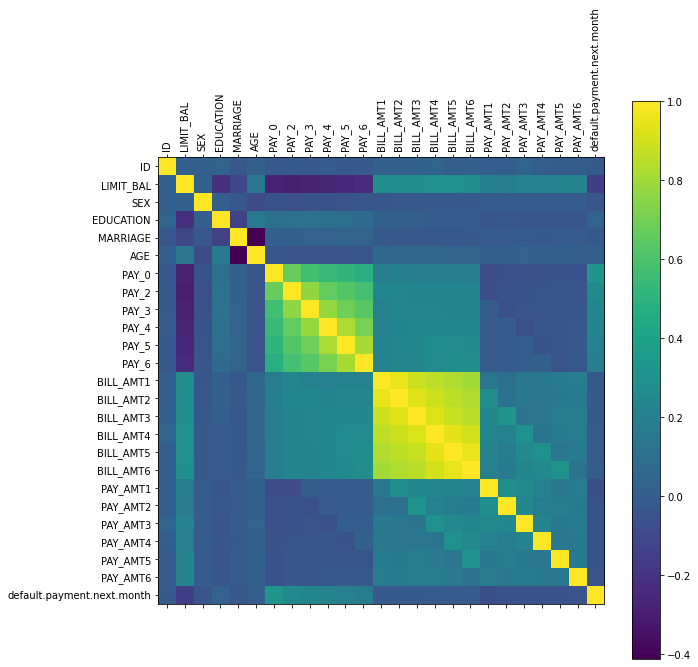

In [ ]:
corr_heatmap(df)

## Sampling

In [ ]:
#ratio of 0 and 1

df["default.payment.next.month"].value_counts()/len(df)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

We can see that the dataset is highly imbalanced. We will use SMOTE to balance the dataset.

In [ ]:
#oversampling the minority class and undersampling the majority class to have same number of data

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42,sampling_strategy="minority")
X = df.drop("default.payment.next.month", axis=1)
y = df["default.payment.next.month"]
X_res, y_res = sm.fit_resample(X, y)

#checking the ratio of 0 and 1
y_res.value_counts()/len(y_res)

1    0.5
0    0.5
Name: default.payment.next.month, dtype: float64

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

print(y.value_counts()/len(y))

over = RandomOverSampler(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=1.0)

X_over, y_over = over.fit_resample(X, y)
print(y_over.value_counts()/len(y_over))

X_res, y_res = under.fit_resample(X_over, y_over)
y_res.value_counts()/len(y_res)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64
0    0.625007
1    0.374993
Name: default.payment.next.month, dtype: float64


0    0.5
1    0.5
Name: default.payment.next.month, dtype: float64

**Sampling strategy** corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling. Therefore, the ratio is expressed as Nm/Nrm
where
Nm is the number of samples in the minority/majority class and
Nrm is the number of samples in the majority/minority class after resampling.

In [ ]:
#comparision of lengths
# print("length of original X: ", len(X))
print("length of original y: ", len(y))
# print("length of oversampled X: ", len(X_res))
print("length of oversampled Y: ", len(y_res))

length of original y:  30000
length of oversampled Y:  28036


## Normalize features

In [ ]:
transformer = [("num", std(), X_res.columns)]

ct = ColumnTransformer(transformers=transformer, remainder="passthrough")

X_transformed = pd.DataFrame(ct.fit_transform(X_res))

X_transformed.columns = X_res.columns

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_transformed, y_res, test_size=0.2)

In [ ]:
x_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2674,-1.452198,-0.584368,0.985763,1.683510,-0.880758,0.522272,-0.156399,-0.036878,0.008614,0.059771,...,0.476410,-0.267187,-0.226849,-0.201797,-0.089245,-0.101342,-0.231528,-0.233062,-0.231898,-0.219661
18589,0.438578,-0.664102,0.985763,1.683510,-0.880758,-1.294121,-0.156399,-0.036878,0.008614,0.059771,...,0.064339,-0.182067,-0.186967,-0.470249,-0.053429,-0.097284,0.037326,-0.154254,-0.081181,-0.088670
5651,-1.098517,-1.062774,0.985763,0.318805,1.061848,-0.953547,-1.051902,1.616878,-0.824709,1.736232,...,-0.611380,-0.623745,-0.632703,-0.629627,-0.339958,-0.030581,-0.290305,-0.301420,-0.289193,-0.283598
8601,-0.748043,0.691381,-1.014443,-1.045900,-0.880758,0.181698,-0.156399,-0.036878,0.008614,0.059771,...,2.532961,2.731853,2.991961,2.949059,0.268486,0.149859,0.179911,0.250819,0.230690,0.204306
42109,-1.384361,0.531912,0.985763,0.318805,-0.880758,0.976370,-0.156399,-0.036878,0.008614,0.059771,...,-0.223530,-0.170193,-0.104705,-0.079461,-0.142104,-0.158400,-0.120604,-0.050218,-0.109334,0.005451


In [ ]:
x_train["SEX"].value_counts()

 0.985763    18944
-1.014443    18438
Name: SEX, dtype: int64

In [ ]:
X_transformed["default.payment.next.month"] = y_res

In [ ]:
X_transformed.to_csv("data/credit_card_processed.csv", index=False)